In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import os
import cv2

In [10]:
central_dataframe_parent_folder = './central_dataframe'
files = os.listdir(central_dataframe_parent_folder)
# print(files)
# list(os.scandir(central_dataframe_parent_folder))

all_cols = ['00_parameters/log_dir' , '00_parameters/N', '00_parameters/k', '00_parameters/max_ls', '00_parameters/pad_size',
         '01_bounding_box_data/bounding_circle', '01_bounding_box_data/bounding_square',
         '01_bounding_box_data/bounding_square_height', '01_bounding_box_data/bounding_square_width',
         '02_simulation_data/num_diff_locus_points', '02_simulation_data/num_brownian_motion_steps',
         '03_cv_data/cv_centroid_x', '03_cv_data/cv_centroid_y',
         '03_cv_data/cv_leftmost_x', '03_cv_data/cv_leftmost_y',
         '03_cv_data/cv_rightmost_x', '03_cv_data/cv_rightmost_y',
         '03_cv_data/cv_topmost_x', '03_cv_data/cv_topmost_y',
         '03_cv_data/cv_bottommost_x', '03_cv_data/cv_bottommost_y',
         '03_cv_data/cv_contour_area', '03_cv_data/cv_contour_perimeter',
         '03_cv_data/cv_contour_k', '03_cv_data/cv_boundingRect_x',
         '03_cv_data/cv_boundingRect_y', '03_cv_data/cv_boundingRect_w',
         '03_cv_data/cv_boundingRect_h', '03_cv_data/cv_boundingRect_area',
         '03_cv_data/cv_hull_area', '03_cv_data/cv_extent',
         '03_cv_data/cv_solidity', '03_cv_data/cv_minEnclosingCircle_center_x',
         '03_cv_data/cv_minEnclosingCircle_center_y', '03_cv_data/cv_minEnclosingCircle_r',
         '03_cv_data/cv_equi_radius', '04_fractal_dimension/polyfit_coeff0',
         '04_fractal_dimension/polyfit_coeff1'
         ]

central_pandas_dataframe = pd.DataFrame(columns=all_cols)
for file_name in os.scandir(central_dataframe_parent_folder):
    print(file_name)
    log_dataframe = pd.read_csv(file_name)    
    central_pandas_dataframe = pd.concat([central_pandas_dataframe, log_dataframe])
    
central_pandas_dataframe.to_csv('central_pandas_dataframe.csv')
print(f'Shape of the dataframe : {central_pandas_dataframe.shape}')

<DirEntry 'k0.5_good.csv'>
<DirEntry 'k0.05_good.csv'>


/home/sourabh/miniconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



<DirEntry 'k0.025_good.csv'>
<DirEntry 'k0.003125_good.csv'>
<DirEntry 'k1.0_good.csv'>
<DirEntry 'k0.0125_good.csv'>
<DirEntry 'k0.00625_good.csv'>
<DirEntry 'k0.0015625_good.csv'>
<DirEntry 'k0.1_good.csv'>
Shape of the dataframe : (138970, 39)


In [11]:
# required_col = ['01_bounding_box_data/bounding_circle', '01_bounding_box_data/bounding_square',
#          '03_cv_data/cv_contour_area', '03_cv_data/cv_contour_perimeter',
#          '03_cv_data/cv_boundingRect_area',
#          '03_cv_data/cv_hull_area', '03_cv_data/cv_extent',
#          '03_cv_data/cv_solidity', '03_cv_data/cv_minEnclosingCircle_r',
#          '03_cv_data/cv_equi_radius', '04_fractal_dimension/polyfit_coeff0',
#          '04_fractal_dimension/polyfit_coeff1', '00_parameters/N', '00_parameters/k']
required_col = ['03_cv_data/cv_contour_perimeter', '00_parameters/N', '00_parameters/k']

In [12]:
central_pandas_dataframe_main = central_pandas_dataframe.drop_duplicates()
central_pandas_dataframe = central_pandas_dataframe_main[required_col]
central_pandas_dataframe = central_pandas_dataframe.astype(dtype='float')

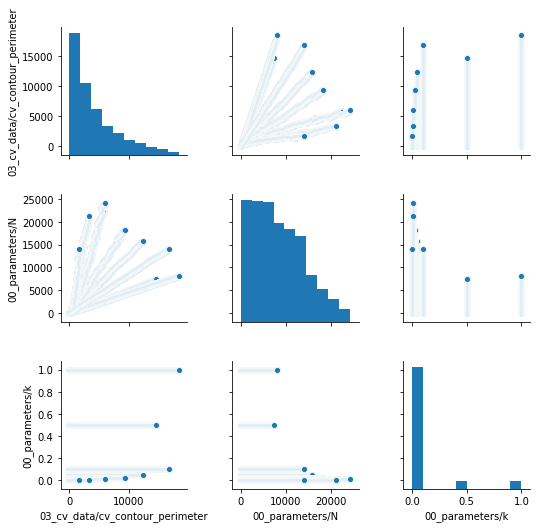

In [10]:
sns.pairplot(central_pandas_dataframe.loc[:,central_pandas_dataframe.dtypes == 'float64'])

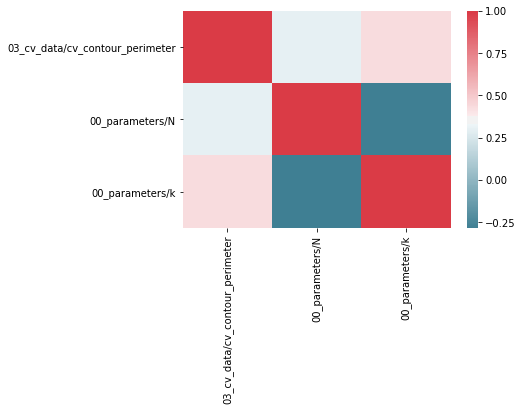

In [9]:
corr = central_pandas_dataframe.loc[:,central_pandas_dataframe.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

==============> Model complexity = 1 <===============
[ 3.79994994 -8.20074234]
Mean Absolute Error : Dev=0.034605793623856546, Test=0.03476184385783857
Mean Squared Error : Dev=0.0073792612893601684, Test=0.007321327640768875
% Mean Absolute Error : Dev=0.03464043405791446 %, Test=0.03479664049833691 %
% Mean Squared Error : Dev=0.007386647937297466 %, Test=0.0073286562970659415 %
==============> Model complexity = 1 <===============
==============> Model complexity = 2 <===============
[-0.90929525  5.81570863 -8.79507222]
Mean Absolute Error : Dev=0.021501409885956266, Test=0.021909946338498836
Mean Squared Error : Dev=0.0026464175610007843, Test=0.0027615492932151894
% Mean Absolute Error : Dev=0.021522932818775042 %, Test=0.02193187821671555 %
% Mean Squared Error : Dev=0.0026490666276284126 %, Test=0.0027643136068220115 %
==============> Model complexity = 2 <===============
==============> Model complexity = 3 <===============
[ 1.4818883  -5.88747087 10.0090933  -9.54540298]
Me

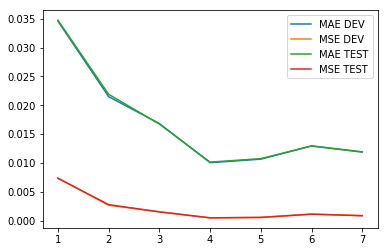

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.svm import SVR

X = central_pandas_dataframe.to_numpy()
y = X[:,-1]
X = X[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_slopes = X_train[:,0]/X_train[:,1]
X_dev_slopes = X_dev[:,0]/X_dev[:,1]
X_test_slopes = X_test[:,0]/X_test[:,1]

maes_dev = {}
mses_dev = {}
maes_test = {}
mses_test = {}
for model_complexity in range(1,8):
    print(f'==============> Model complexity = {model_complexity} <===============')
    coeffs = np.polyfit(X_train_slopes, np.log2(y_train), model_complexity)
    print(coeffs)

    f = np.poly1d(coeffs)

    y_test_pred = 2 ** f(X_test_slopes)
    y_dev_pred = 2 ** f(X_dev_slopes)
#     print(y_test_pred)
#     print(y_test)


    mae_dev = np.abs(y_dev - y_dev_pred).mean()
    mae_test = np.abs(y_test - y_test_pred).mean()
    maes_dev[model_complexity] = mae_dev
    maes_test[model_complexity] = mae_test
    print(f'Mean Absolute Error : Dev={mae_dev}, Test={mae_test}')
    mse_dev = np.square(y_dev - y_dev_pred).mean()
    mse_test = np.square(y_test - y_test_pred).mean()
    mses_dev[model_complexity] = mse_dev
    mses_test[model_complexity] = mse_test
    print(f'Mean Squared Error : Dev={mse_dev}, Test={mse_test}')
    print(f'% Mean Absolute Error : Dev={mae_dev/(1.0 - 0.001)} %, Test={mae_test/(1.0 - 0.001)} %')
    print(f'% Mean Squared Error : Dev={mse_dev/(1.0 - 0.001)} %, Test={mse_test/(1.0 - 0.001)} %')
    print(f'==============> Model complexity = {model_complexity} <===============')
    
plt.plot(np.arange(1,model_complexity+1), maes_dev.values(), label='MAE DEV')
plt.plot(np.arange(1,model_complexity+1), mses_dev.values(), label='MSE DEV')
plt.plot(np.arange(1,model_complexity+1), maes_test.values(), label='MAE TEST')
plt.plot(np.arange(1,model_complexity+1), mses_test.values(), label='MSE TEST')
plt.legend()


In [14]:
X = central_pandas_dataframe.to_numpy()
y = X[:,-1]
X = X[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_slopes = X_train[:,0]/X_train[:,1]
X_dev_slopes = X_dev[:,0]/X_dev[:,1]
X_test_slopes = X_test[:,0]/X_test[:,1]

model_complexity = 4
print(f'==============> Best Model complexity = {model_complexity} <===============')
coeffs = np.polyfit(X_train_slopes, np.log2(y_train), model_complexity)
print(coeffs)

f = np.poly1d(coeffs)

y_test_pred = 2 ** f(X_test_slopes)
y_dev_pred = 2 ** f(X_dev_slopes)
#     print(y_test_pred)
#     print(y_test)


mae_dev = np.abs(y_dev - y_dev_pred).mean()
mae_test = np.abs(y_test - y_test_pred).mean()
maes_dev[model_complexity] = mae_dev
maes_test[model_complexity] = mae_test
print(f'Mean Absolute Error : Dev={mae_dev}, Test={mae_test}')
mse_dev = np.square(y_dev - y_dev_pred).mean()
mse_test = np.square(y_test - y_test_pred).mean()
mses_dev[model_complexity] = mse_dev
mses_test[model_complexity] = mse_test
print(f'Mean Squared Error : Dev={mse_dev}, Test={mse_test}')
print(f'% Mean Absolute Error : Dev={mae_dev/(1.0 - 0.001)} %, Test={mae_test/(1.0 - 0.001)} %')
print(f'% Mean Squared Error : Dev={mse_dev/(1.0 - 0.001)} %, Test={mse_test/(1.0 - 0.001)} %')
print(f'==============> Best Model complexity = {model_complexity} <===============')


==============> Best Model complexity = 4 <===============
[ -0.77900474   5.01750095 -11.01654896  12.64525983  -9.90503926]
Mean Absolute Error : Dev=0.010041753320082317, Test=0.010135579009699957
Mean Squared Error : Dev=0.00045377824009147264, Test=0.00047378414755527116
% Mean Absolute Error : Dev=0.010051805125207525 %, Test=0.010145724734434392 %
% Mean Squared Error : Dev=0.0004542324725640367 %, Test=0.0004742584059612324 %
==============> Best Model complexity = 4 <===============


==============> Model complexity = 1 <===============
[ 4.69211011 -8.54358787]
Mean Absolute Error : Dev=0.009118219964237078, Test=0.008773537201193267
Mean Squared Error : Dev=0.0019426559912545326, Test=0.00144990013819351
% Mean Absolute Error : Dev=0.18608612171912403 %, Test=0.1790517796161891 %
% Mean Squared Error : Dev=0.0396460406378476 %, Test=0.02958979873864306 %
==============> Model complexity = 1 <===============
==============> Model complexity = 2 <===============
[-5.28776517 10.45742063 -9.6578828 ]
Mean Absolute Error : Dev=0.005148196630052128, Test=0.005138430705458431
Mean Squared Error : Dev=4.988998692988575e-05, Test=4.9793340423632625e-05
% Mean Absolute Error : Dev=0.10506523734800262 %, Test=0.10486593276445777 %
% Mean Squared Error : Dev=0.001018162998569097 %, Test=0.0010161906208904616 %
==============> Model complexity = 2 <===============
==============> Model complexity = 3 <===============
[ 1.03048685 -7.60102932 11.84019919 -9.85709796]
Mean Abs

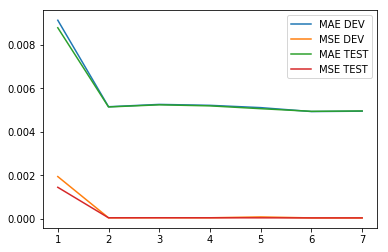

In [15]:
# X = central_pandas_dataframe.loc[:,central_pandas_dataframe['00_parameters/k'] <=0.05].to_numpy()
# y = X[:,-1]
# X = X[:,:-1]

k_005_0001 = y <= 0.05

y_k_005_0001 = y[k_005_0001]
X_k_005_0001 = X[k_005_0001]

X_train_005_0001, X_test_005_0001, y_train_005_0001, y_test_005_0001 = train_test_split(X_k_005_0001, y_k_005_0001, test_size=0.33, random_state=42)
X_train_005_0001, X_dev_005_0001, y_train_005_0001, y_dev_005_0001 = train_test_split(X_train_005_0001, y_train_005_0001, test_size=0.2, random_state=42)

X_train_005_0001_slopes = X_train_005_0001[:,0]/X_train_005_0001[:,1]
X_dev_005_0001_slopes = X_dev_005_0001[:,0]/X_dev_005_0001[:,1]
X_test_005_0001_slopes = X_test_005_0001[:,0]/X_test_005_0001[:,1]

maes_dev_005_0001 = {}
mses_dev_005_0001 = {}
maes_test_005_0001 = {}
mses_test_005_0001 = {}
for model_complexity in range(1,8):
    print(f'==============> Model complexity = {model_complexity} <===============')
    coeffs_005_0001 = np.polyfit(X_train_005_0001_slopes, np.log2(y_train_005_0001), model_complexity)
    print(coeffs_005_0001)

    f_005_0001 = np.poly1d(coeffs_005_0001)

    y_test_005_0001_pred = 2 ** f_005_0001(X_test_005_0001_slopes)
    y_dev_005_0001_pred = 2 ** f_005_0001(X_dev_005_0001_slopes)
#     print(y_test_pred)
#     print(y_test)


    mae_dev_005_0001 = np.abs(y_dev_005_0001 - y_dev_005_0001_pred).mean()
    mae_test_005_0001 = np.abs(y_test_005_0001 - y_test_005_0001_pred).mean()
    maes_dev_005_0001[model_complexity] = mae_dev_005_0001
    maes_test_005_0001[model_complexity] = mae_test_005_0001
    print(f'Mean Absolute Error : Dev={mae_dev_005_0001}, Test={mae_test_005_0001}')
    mse_dev_005_0001 = np.square(y_dev_005_0001 - y_dev_005_0001_pred).mean()
    mse_test_005_0001 = np.square(y_test_005_0001 - y_test_005_0001_pred).mean()
    mses_dev_005_0001[model_complexity] = mse_dev_005_0001
    mses_test_005_0001[model_complexity] = mse_test_005_0001
    print(f'Mean Squared Error : Dev={mse_dev_005_0001}, Test={mse_test_005_0001}')
    print(f'% Mean Absolute Error : Dev={mae_dev_005_0001/(0.05 - 0.001)} %, Test={mae_test_005_0001/(0.05 - 0.001)} %')
    print(f'% Mean Squared Error : Dev={mse_dev_005_0001/(0.05 - 0.001)} %, Test={mse_test_005_0001/(0.05 - 0.001)} %')
    print(f'==============> Model complexity = {model_complexity} <===============')
    
plt.plot(np.arange(1,model_complexity+1), maes_dev_005_0001.values(), label='MAE DEV')
plt.plot(np.arange(1,model_complexity+1), mses_dev_005_0001.values(), label='MSE DEV')
plt.plot(np.arange(1,model_complexity+1), maes_test_005_0001.values(), label='MAE TEST')
plt.plot(np.arange(1,model_complexity+1), mses_test_005_0001.values(), label='MSE TEST')
plt.legend()


In [16]:
y_k_005_0001 = y[k_005_0001]
X_k_005_0001 = X[k_005_0001]

X_train_005_0001, X_test_005_0001, y_train_005_0001, y_test_005_0001 = train_test_split(X_k_005_0001, y_k_005_0001, test_size=0.33, random_state=42)
X_train_005_0001, X_dev_005_0001, y_train_005_0001, y_dev_005_0001 = train_test_split(X_train_005_0001, y_train_005_0001, test_size=0.2, random_state=42)

X_train_005_0001_slopes = X_train_005_0001[:,0]/X_train_005_0001[:,1]
X_dev_005_0001_slopes = X_dev_005_0001[:,0]/X_dev_005_0001[:,1]
X_test_005_0001_slopes = X_test_005_0001[:,0]/X_test_005_0001[:,1]

model_complexity = 2
print(f'==============> Best Model complexity = {model_complexity} <===============')

coeffs_005_0001 = np.polyfit(X_train_005_0001_slopes, np.log2(y_train_005_0001), model_complexity)
print(coeffs_005_0001)

f_005_0001 = np.poly1d(coeffs_005_0001)

y_test_005_0001_pred = 2 ** f_005_0001(X_test_005_0001_slopes)
y_dev_005_0001_pred = 2 ** f_005_0001(X_dev_005_0001_slopes)
#     print(y_test_pred)
#     print(y_test)


mae_dev = np.abs(y_dev_005_0001 - y_dev_005_0001_pred).mean()
mae_test = np.abs(y_test_005_0001 - y_test_005_0001_pred).mean()
maes_dev_005_0001[model_complexity] = mae_dev_005_0001
maes_test_005_0001[model_complexity] = mae_test_005_0001
print(f'Mean Absolute Error : Dev={mae_dev_005_0001}, Test={mae_test_005_0001}')
mse_dev_005_0001 = np.square(y_dev_005_0001 - y_dev_005_0001_pred).mean()
mse_test_005_0001 = np.square(y_test_005_0001 - y_test_005_0001_pred).mean()
mses_dev_005_0001[model_complexity] = mse_dev_005_0001
mses_test_005_0001[model_complexity] = mse_test_005_0001
print(f'Mean Squared Error : Dev={mse_dev_005_0001}, Test={mse_test_005_0001}')
print(f'% Mean Absolute Error : Dev={mae_dev_005_0001/(0.05 - 0.001)} %, Test={mae_test_005_0001/(0.05 - 0.001)} %')
print(f'% Mean Squared Error : Dev={mse_dev_005_0001/(0.05 - 0.001)} %, Test={mse_test_005_0001/(0.05 - 0.001)} %')
print(f'==============> Best Model complexity = {model_complexity} <===============')

==============> Best Model complexity = 2 <===============
[-5.28776517 10.45742063 -9.6578828 ]
Mean Absolute Error : Dev=0.004945014578850405, Test=0.004954034857431063
Mean Squared Error : Dev=4.988998692988575e-05, Test=4.9793340423632625e-05
% Mean Absolute Error : Dev=0.10091866487449806 %, Test=0.10110275219247067 %
% Mean Squared Error : Dev=0.001018162998569097 %, Test=0.0010161906208904616 %
==============> Best Model complexity = 2 <===============


In [25]:
import cv2
import imutils
import numpy as np
base_img_path = './images/test_image_samples/k005_checkpoint.png'
k = 0.05
# base_img_path = './images/test_image_samples/k0025_checkpoint.png'
# k = 0.025
# base_img_path = './images/test_image_samples/k00125_checkpoint.png'
# k = 0.0125
# base_img_path = './images/test_image_samples/k000625_checkpoint.png'
# k = 0.00625
# base_img_path = './images/test_image_samples/k0003125_checkpoint.png'
# k = 0.003125
# base_img_path = './images/test_image_samples/k00015625_checkpoint.png'
# k = 0.0015625
# base_img_path = './images/test_image_samples/Brownian_Tree_k0.05_ls417_N16834_reached.png'
# k = 0.05
# base_img_path = './images/test_image_samples/Brownian_Tree_k0.025_ls373_N13659_reached.png'
# k = 0.025
# base_img_path = './images/test_image_samples/Brownian_Tree_k0.0125_ls327_N18965_reached.png'
# k = 0.0125
# base_img_path = './images/test_image_samples/Brownian_Tree_k0.00625_ls321_N28833_reached.png'
# k = 0.00625
# base_img_path = './images/test_image_samples/Brownian_Tree_k0.003125_ls263_N28676_reached.png'
# k = 0.003125
# base_img_path = './images/test_image_samples/Brownian_Tree_k0.0015625_ls205_N17335_reached.png'
# k = 0.0015625
base_img_rgb = cv2.imread(base_img_path)
base_img = cv2.cvtColor(base_img_rgb, cv2.COLOR_BGR2GRAY)  # convert to gray scale

ret, thresh = cv2.threshold(base_img, 127, 255, 0)  # Thresholding for binary map
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours_imutils = imutils.grab_contours((contours, hierarchy))
cnt_imutils = max(contours_imutils, key=cv2.contourArea)

cnt = cnt_imutils

# get contour area, perimeter, convexity, rect_bounding box
cv_contour_perimeter = cv2.arcLength(cnt, True)

num_particles = np.array(np.where(base_img)).transpose().shape[0]

# num_particles
# cv_contour_perimeter
X = cv_contour_perimeter/num_particles
k_pred = 2 ** f_005_0001(X)

print(f'Input image path : {base_img_path}')
print(f'predicted stickiness (k) = {k_pred}, Acutal stickiness (k) = {k}')

Input image path : /home/sourabh/Desktop/DLA/report/images/k/k00015625_checkpoint.png
predicted stickiness (k) = 0.0027974002432323824, Acutal stickiness (k) = 0.0015625
